<a href="https://colab.research.google.com/github/MhammadRezaValiYari/GoldTransectionAnalysisLinearRegression/blob/main/GoldTransectionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis**

## Import Essesional Library

In [67]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [68]:
data = yf.download('GC=F', start='2024-1-1', end='2025-1-7')
data = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


In [69]:
data.head(2)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,,
2024-01-02,2064.399902,2064.399902,2073.699951,2057.100098,2063.500000,61
2024-01-03,2034.199951,2034.199951,2044.000000,2034.199951,2034.199951,54


## Data Cleaning

In [70]:
def clean_columns(data):
  if 'Date' in data.columns:
      data = data.set_index('Date')
  data.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]
  data.columns = [col.replace('GC=F', ' ') for col in data.columns]
  if data.index.name == "Date":
      data = data.reset_index()

In [71]:
clean_columns(data)

In [72]:
data.head(2)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-01-02,2064.399902,2064.399902,2073.699951,2057.100098,2063.500000,61
2024-01-03,2034.199951,2034.199951,2044.000000,2034.199951,2034.199951,54


In [73]:
data = data.reset_index()

In [74]:
data.head(2)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2024-01-02,2064.399902,2064.399902,2073.699951,2057.100098,2063.500000,61
1,2024-01-03,2034.199951,2034.199951,2044.000000,2034.199951,2034.199951,54


In [75]:
data.columns

Index(['Date', 'Adj Close  ', 'Close  ', 'High  ', 'Low  ', 'Open  ',
       'Volume  '],
      dtype='object')

In [76]:
Series = data[['Date', 'Close  ']]

In [77]:
Series.head(2)

,Date,Close
0,2024-01-02,2064.399902
1,2024-01-03,2034.199951


In [78]:
Series = Series.rename(columns={'Close  ': 'Close'})

In [79]:
Series

,Date,Close
0,2024-01-02,2064.399902
1,2024-01-03,2034.199951
2,2024-01-04,2042.300049
3,2024-01-05,2042.400024
4,2024-01-08,2026.599976
...,...,...
250,2024-12-30,2606.100098
251,2024-12-31,2629.199951
252,2025-01-02,2658.899902
253,2025-01-03,2645.000000


## Trending Analysis

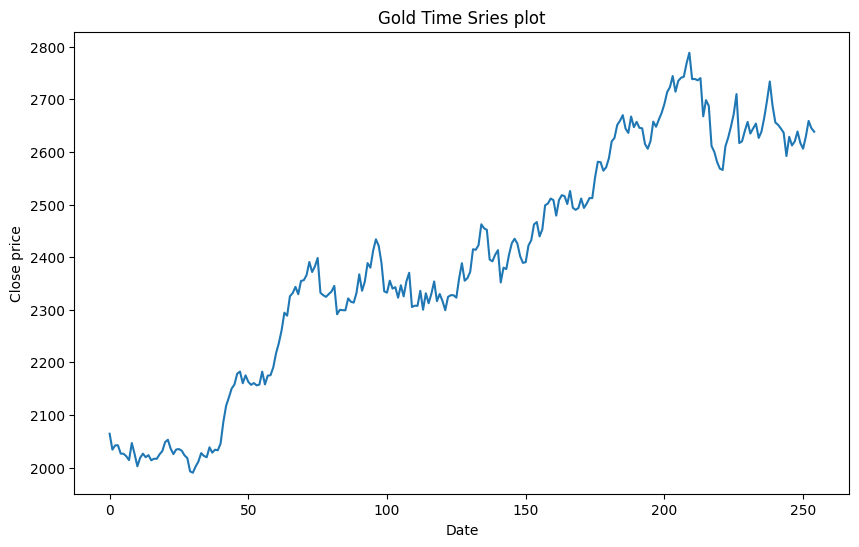

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(Series['Close'])
plt.title('Gold Time Sries plot')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.show()

## Decomposition

In [81]:
Series.columns

Index(['Date', 'Close'], dtype='object')

In [82]:
Series['Date'] = pd.to_datetime(Series['Date']).dt.date

In [83]:
Series.columns

Index(['Date', 'Close'], dtype='object')

In [84]:
Series.isna().sum()

,0
Date,0
Close,0


In [85]:
Series.duplicated(subset='Date').sum()

0

In [86]:
Series['Date']

,Date
0,2024-01-02
1,2024-01-03
2,2024-01-04
3,2024-01-05
4,2024-01-08
...,...
250,2024-12-30
251,2024-12-31
252,2025-01-02
253,2025-01-03


additive
-------------------------------------


<IPython.core.display.Math object>

-----------------------------------


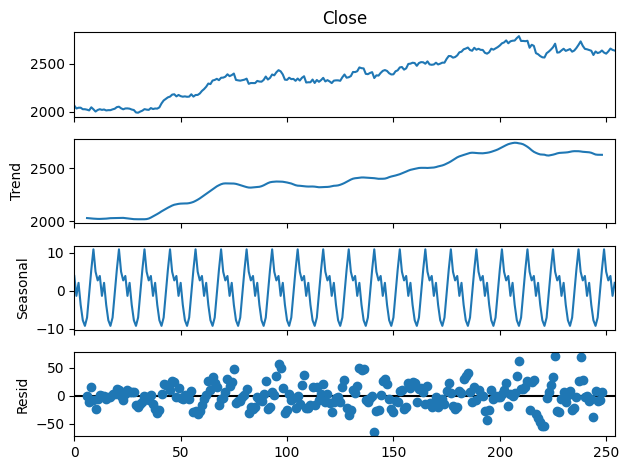

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import display, Math
print('additive')
print('-------------------------------------')
display(Math(r"Y(t) = T(t) + S(t) + R(t)"))
print('-----------------------------------')
decompose_result = seasonal_decompose(Series['Close'], model='additive', period=12)
decompose_result.plot()
plt.show()

## Stationary Test

In [88]:
from statsmodels.tsa.stattools import adfuller

res = adfuller(Series['Close'])

print(f'ADF Statistic: {round(res[0], 2)}')
print(f'p-value: {round(res[1], 2)}')
if res[1] <= 0.05:
    print('The series is stationary')
else:
    print('The series is non-stationary')

ADF Statistic: -1.11
p-value: 0.71
The series is non-stationary


##  Detrending

### Subtract Trend

In [89]:
from scipy.signal import detrend

Series['Detrended'] = detrend(Series['Close'])

res = adfuller(Series['Detrended'])

print(f'ADF Statistic: {round(res[0], 2)}')
print(f'p-value: {round(res[1], 2)}')
if res[1] <= 0.05:
    print('The series is stationary')
else:
    print('The series is non-stationary')

ADF Statistic: -2.45
p-value: 0.13
The series is non-stationary


In [91]:
Series['Close_Diff'] = Series['Close'].diff()

In [92]:
Series['Close_Diff'].isna().sum()

1

In [93]:
Series.dropna(inplace=True)

In [94]:
Series['Close_Diff']

,Close_Diff
1,-30.199951
2,8.100098
3,0.099976
4,-15.800049
5,-0.199951
...,...
250,-11.099854
251,23.099854
252,29.699951
253,-13.899902


In [95]:
res = adfuller(Series['Close_Diff'])

print(f'ADF Statistic: {round(res[0], 2)}')
print(f'p-value: {round(res[1], 2)}')
if res[1] <= 0.05:
    print('The series is stationary')
else:
    print('The series is non-stationary')

ADF Statistic: -17.03
p-value: 0.0
The series is stationary


## ARIMA Model

### Determinat p,q,d



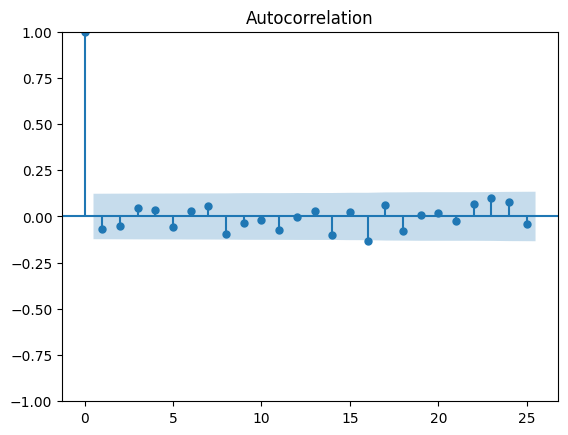

In [96]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(Series['Close_Diff'].dropna())
plt.show()

In [98]:
print('first bar in blue erea is 2, p = 2')

first bar in blue erea is 2, p = 2


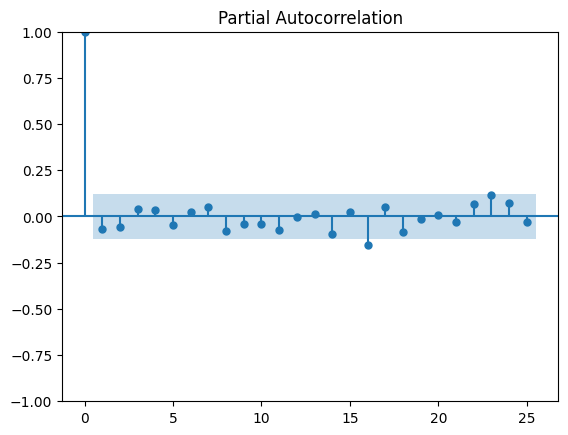

In [100]:
plot_pacf(Series['Close_Diff'].dropna())
plt.show()

In [101]:
print('first bar in blue erea is 2, q = 2')

first bar in blue erea is 2, q = 2


In [102]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(Series['Close_Diff'], order=(2, 1, 2))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [103]:
model_fit.forecast(steps=10)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
254,4.970906
255,0.079326
256,4.389632
257,0.201159
258,4.303845
259,0.282719
260,4.224092
261,0.360877
262,4.147485
263,0.435965


In [105]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Close_Diff   No. Observations:                  254
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1154.995
Date:                Tue, 07 Jan 2025   AIC                           2319.991
Time:                        17:41:19   BIC                           2337.658
Sample:                             0   HQIC                          2327.099
                                - 254                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0553      0.077    -13.753      0.000      -1.206      -0.905
ar.L2         -0.0736      0.071     -1.037      0.300      -0.213       0.065
ma.L1         -0.0005    523.392  -9.08e-07      1.0